# Dataset Preparation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the mushroom dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
    'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'
]
df = pd.read_csv(url, header=None, names=columns)

# Show the first few rows of the dataframe
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis (EDA)

  class cap_shape cap_surface cap_color bruises odor gill_attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         p          w   
1       

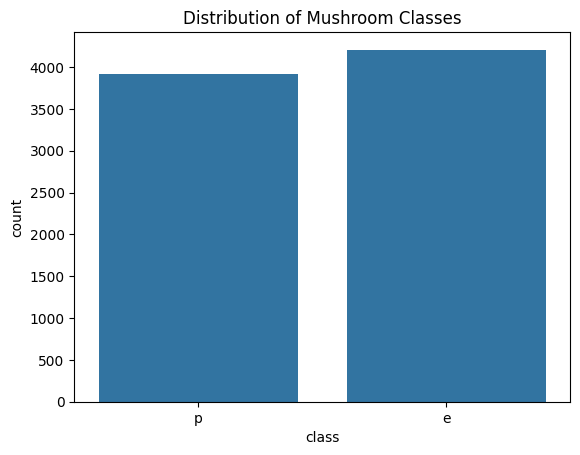

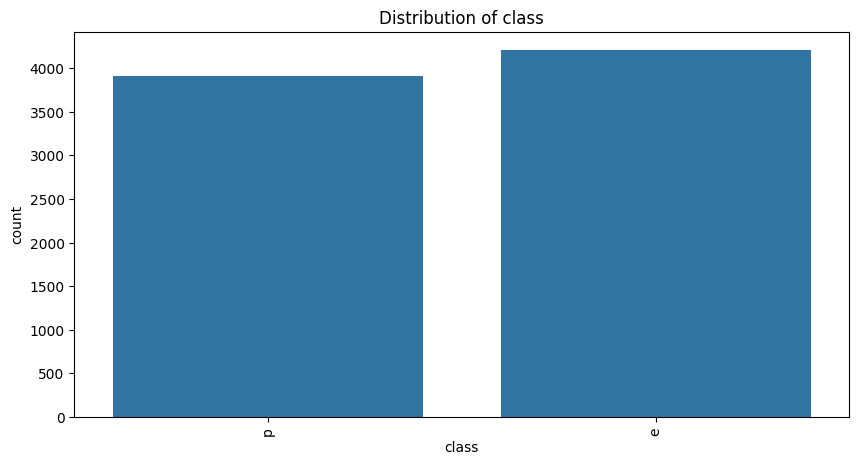

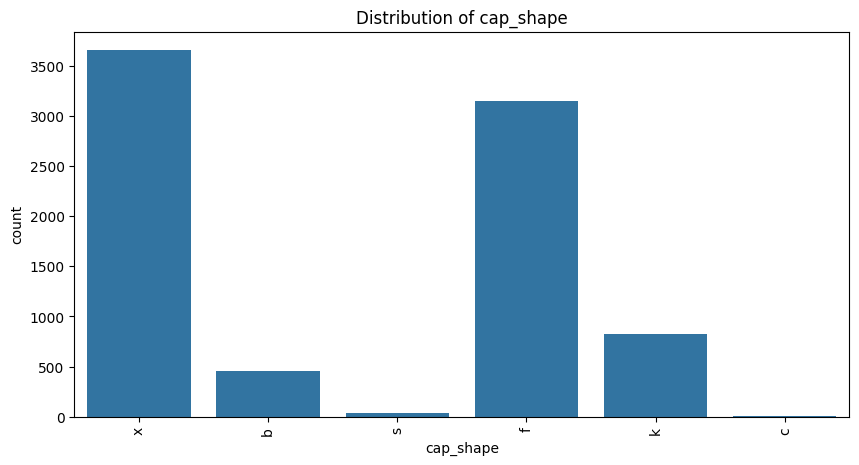

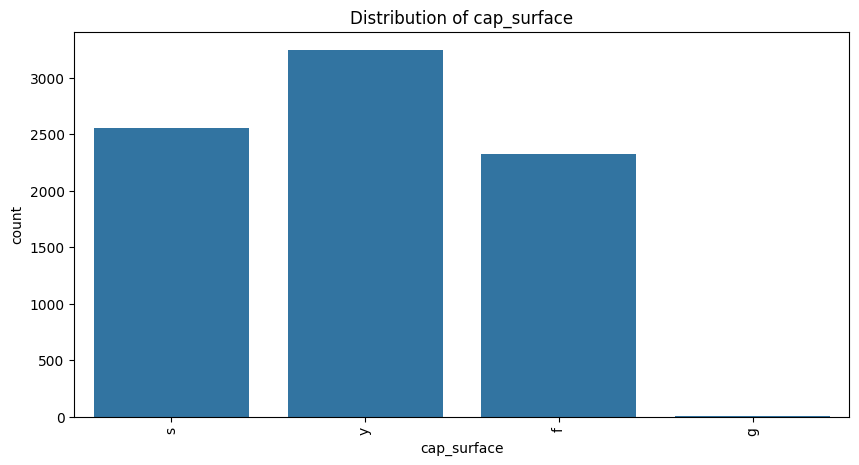

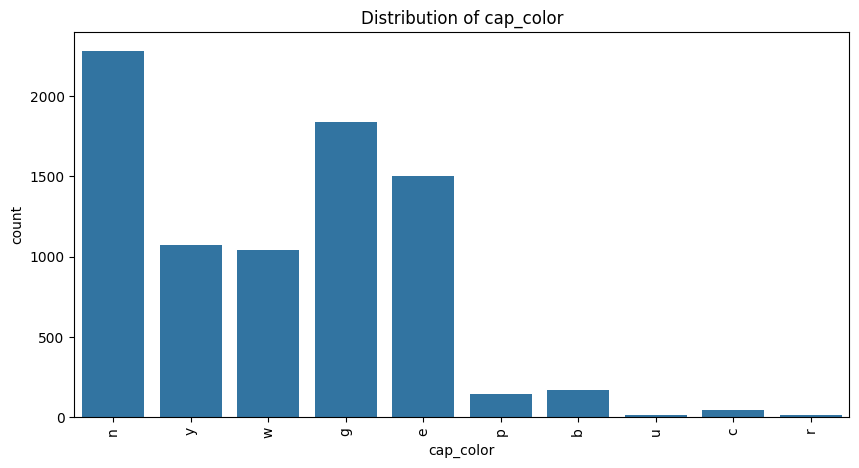

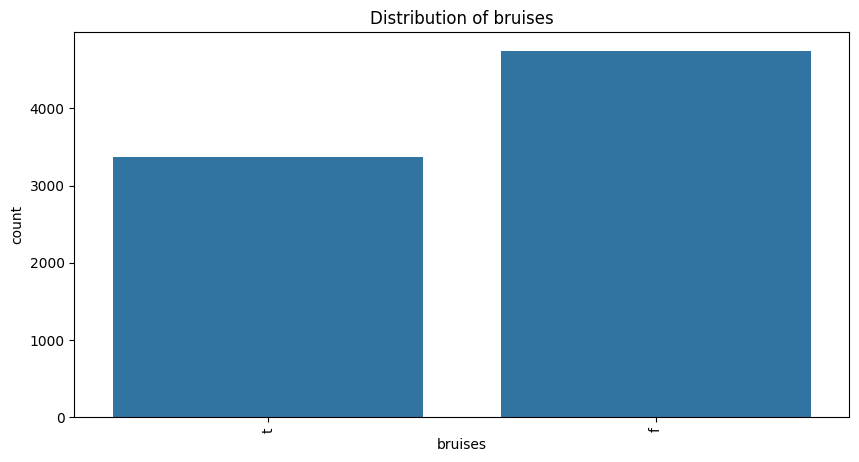

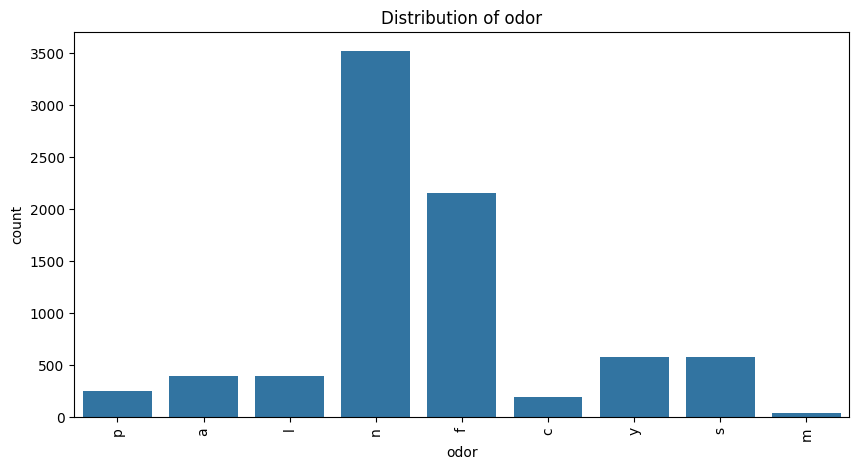

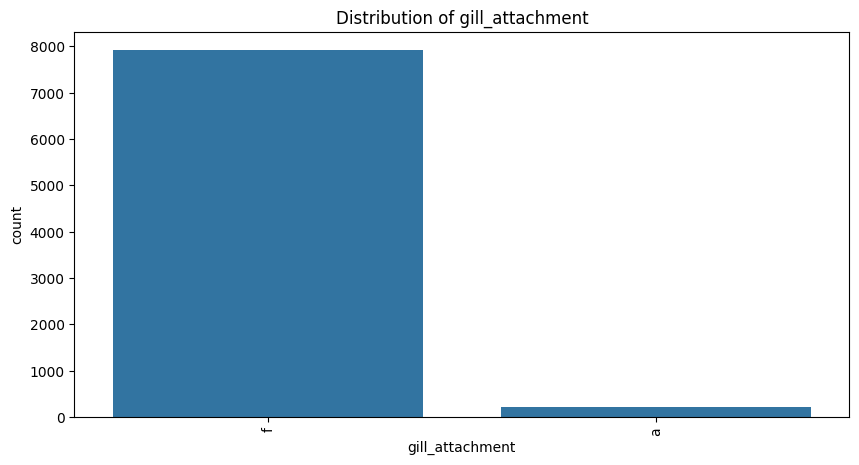

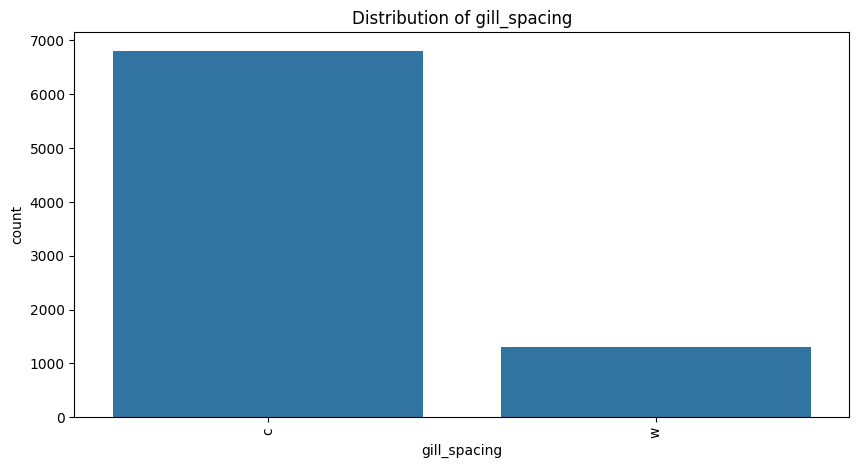

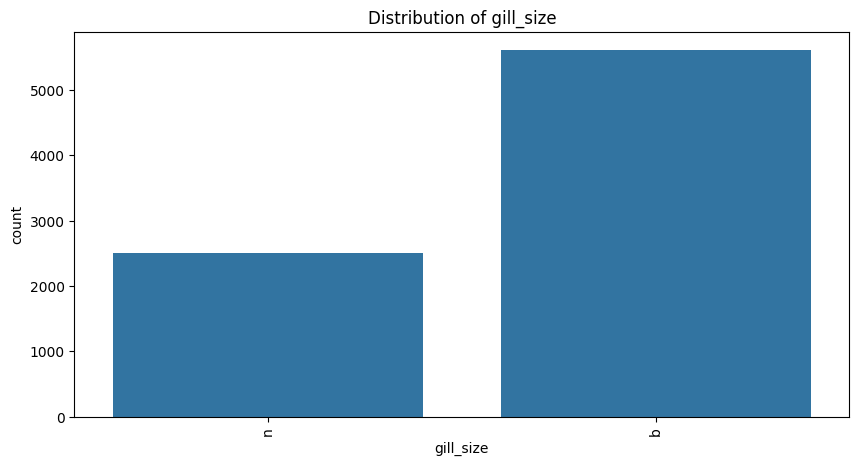

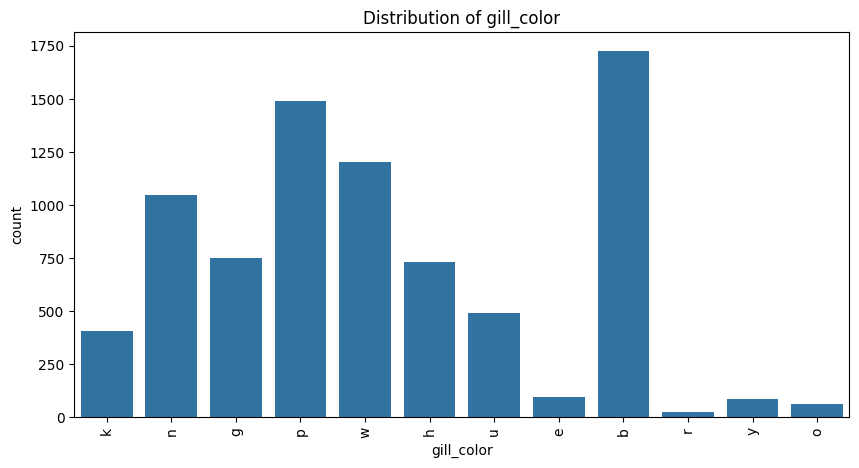

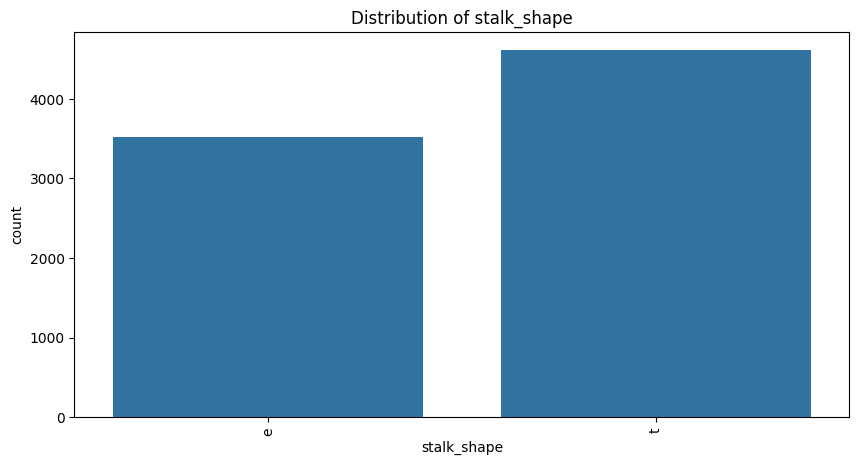

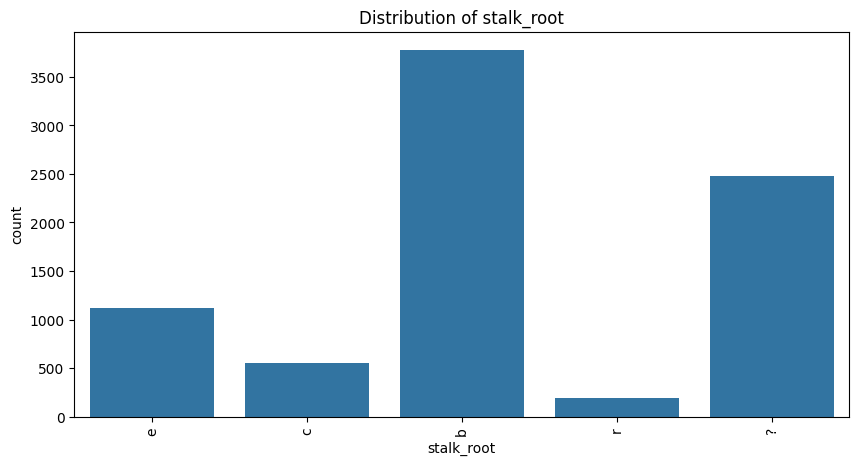

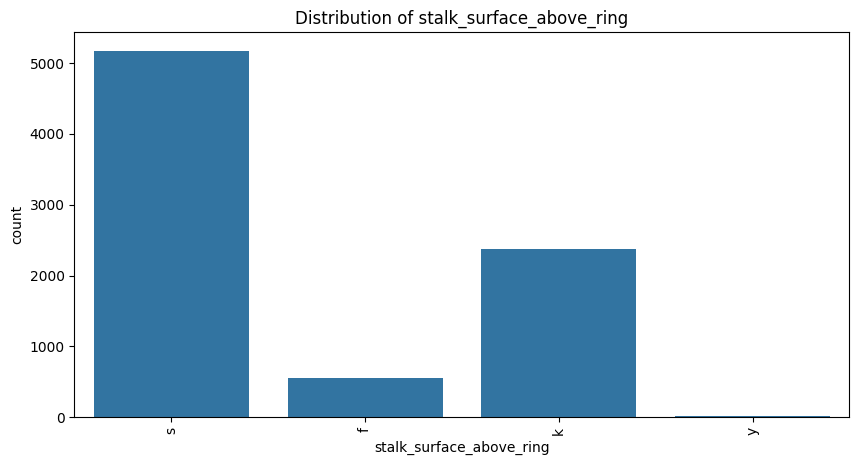

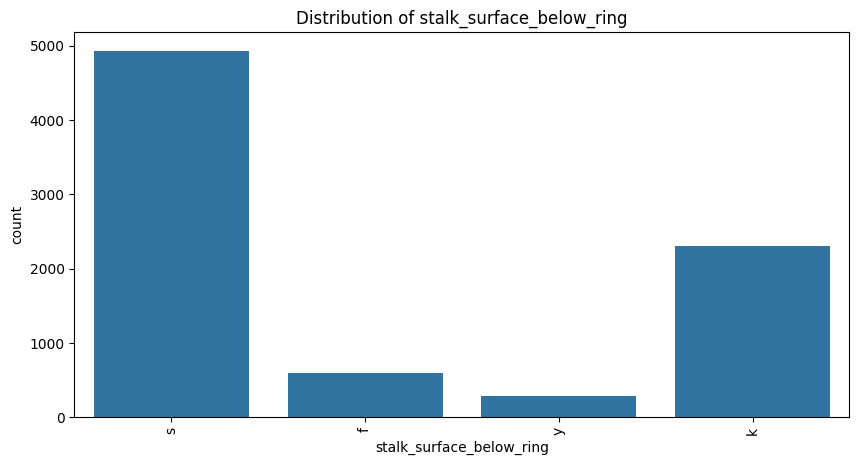

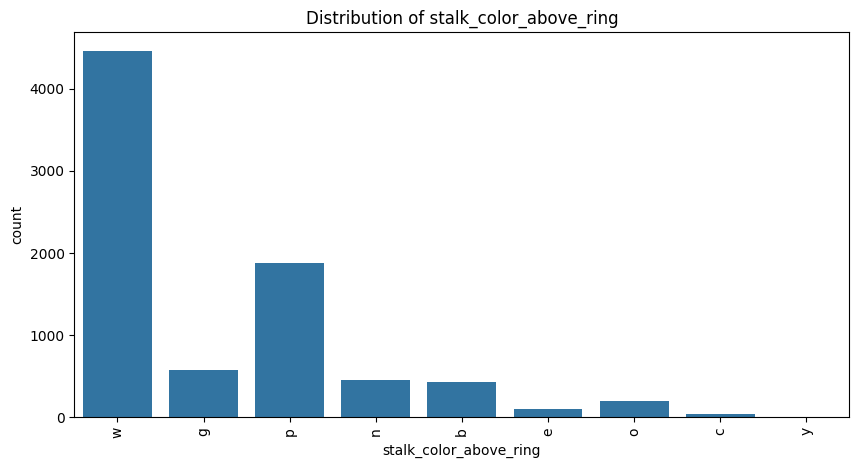

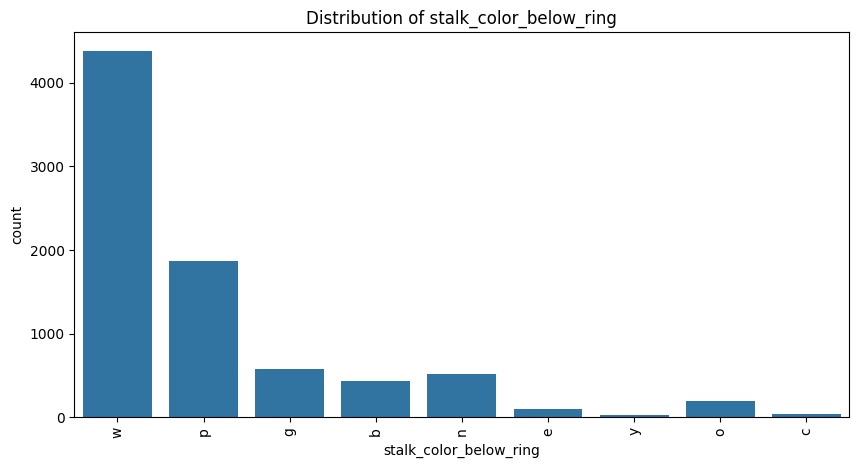

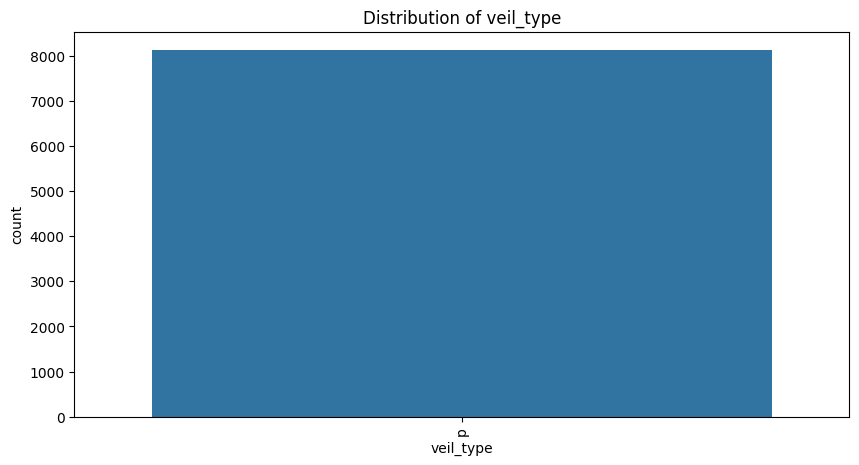

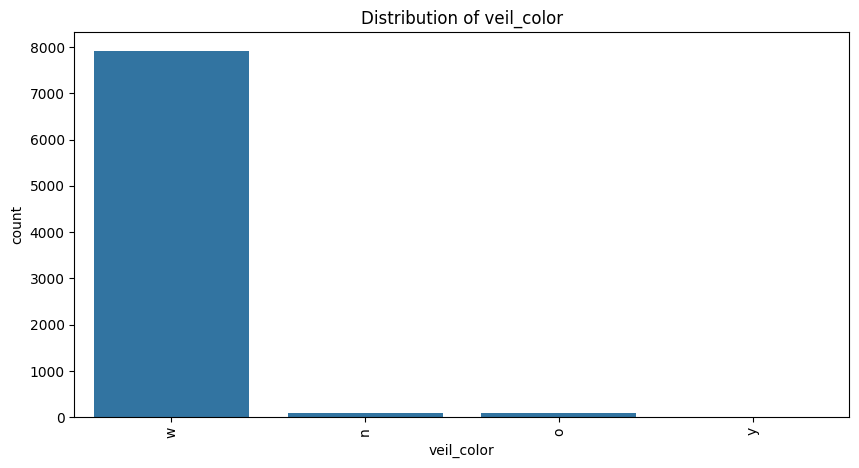

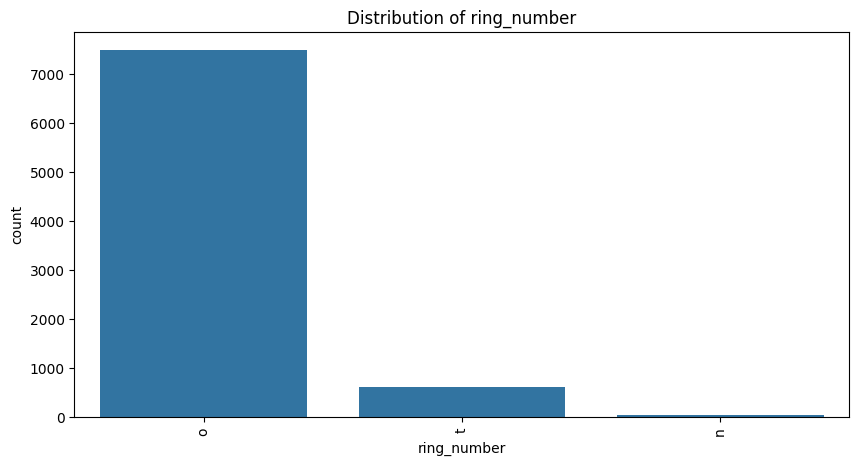

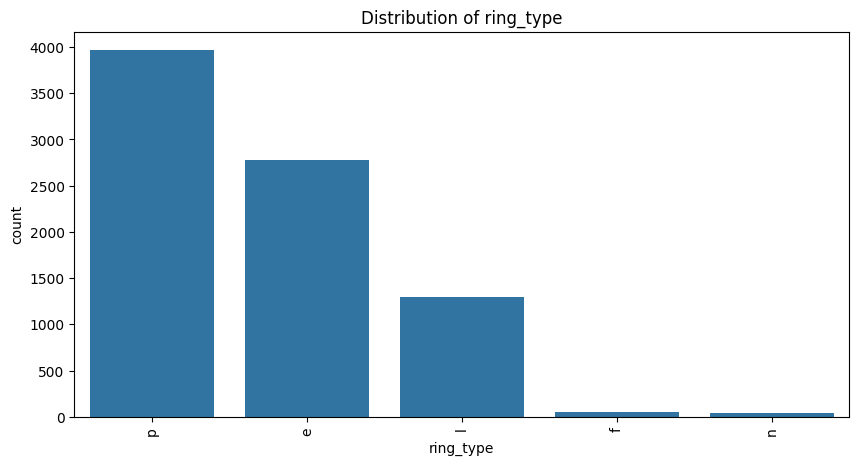

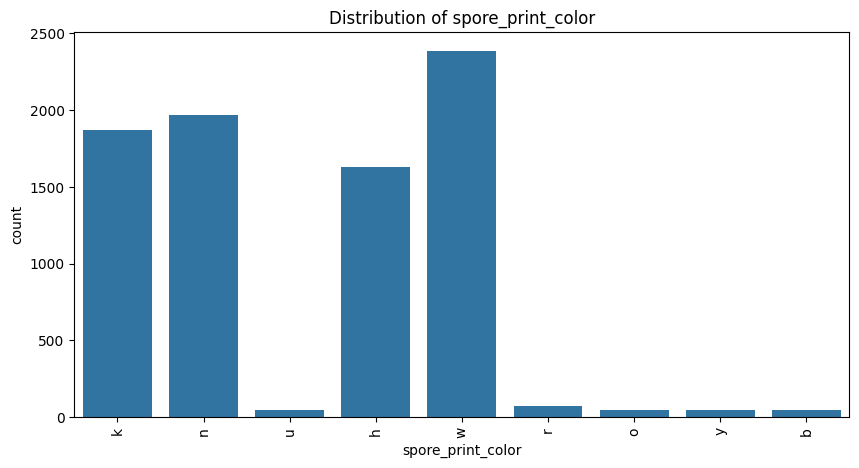

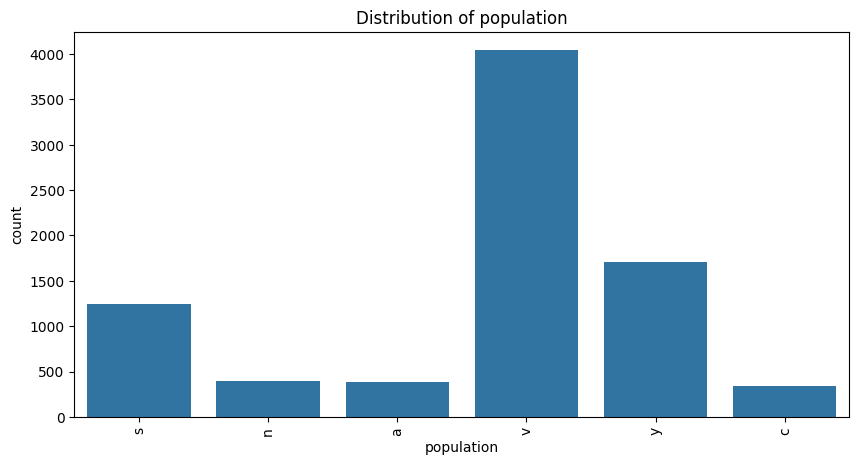

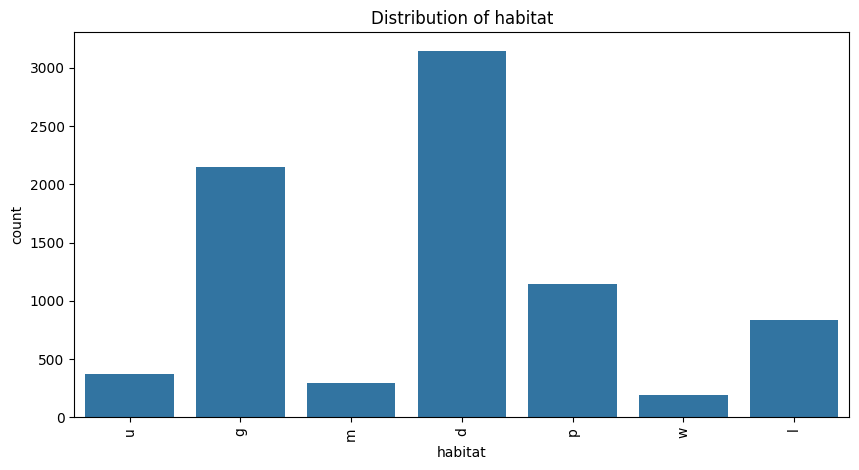

In [9]:
# Display basic information and statistics
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Classes')
plt.show()

# Visualize the distribution of features
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()


# Preprocess the Data

In [10]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and Evaluate Decision Tree and Random Forest Models

Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Accuracies for different n_estimators:
n_estimators=1: 1.00
n_estimators=50: 1.00
n_estimators=100: 1.00
n_estimators=150: 1.00
n_estimators=200: 1.00
n_estimators=250: 1.00


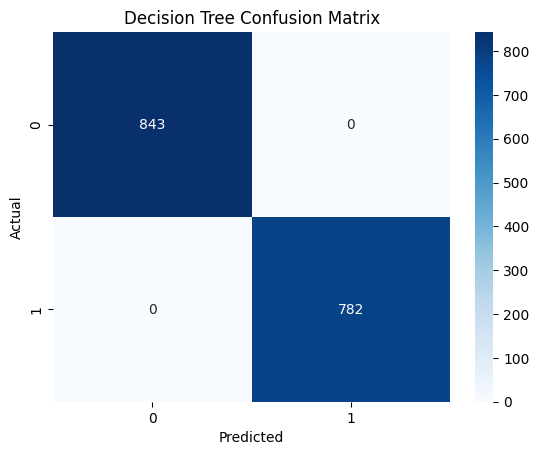

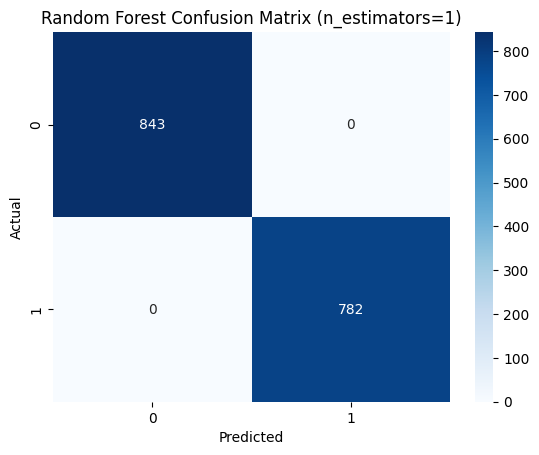

In [11]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Random Forest Classifier with different n_estimators
n_estimators = [1, 50, 100, 150, 200, 250]
rf_accuracies = {}

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    rf_accuracies[n] = accuracy

# Evaluate performance
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Accuracies for different n_estimators:")
for n, acc in rf_accuracies.items():
    print(f"n_estimators={n}: {acc:.2f}")

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Random Forest (with highest accuracy)
best_n = max(rf_accuracies, key=rf_accuracies.get)
rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_best = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f'Random Forest Confusion Matrix (n_estimators={best_n})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
